<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Загрузка-данных" data-toc-modified-id="Загрузка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Загрузка данных</a></span></li><li><span><a href="#Умножение-матриц" data-toc-modified-id="Умножение-матриц-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Умножение матриц</a></span></li><li><span><a href="#Алгоритм-преобразования" data-toc-modified-id="Алгоритм-преобразования-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Алгоритм преобразования</a></span></li><li><span><a href="#Проверка-алгоритма" data-toc-modified-id="Проверка-алгоритма-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Проверка алгоритма</a></span><ul class="toc-item"><li><span><a href="#Общий-вывод" data-toc-modified-id="Общий-вывод-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Общий вывод</a></span></li></ul></li><li><span><a href="#Чек-лист-проверки" data-toc-modified-id="Чек-лист-проверки-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Чек-лист проверки</a></span></li></ul></div>

# Защита персональных данных клиентов

Нам нужно защитить данные клиентов страховой компании «Хоть потоп». Разработаем такой метод преобразования данных, чтобы по ним было сложно восстановить персональную информацию. Обоснуем корректность его работы.

Нужно защитить данные, чтобы при преобразовании качество моделей машинного обучения не ухудшилось. Подбирать наилучшую модель не требуется.

## Загрузка данных

In [1]:
# загрузим необходимые библиотеки.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# линейная регрессия
from sklearn.linear_model import LinearRegression
# метрика r2
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split

# для проверки данных на мультиколлениальность.
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

# зададим рандомстейт.
RANDOM_STATE = 12345

In [2]:
# загрузим файл.
insurance = pd.read_csv('insurance.csv')


In [3]:
# Создадим функцию с информацией о датафрейме.
def review(df):
    info = display(df.sample(5)), 
    display('Информация по данным'),
    df.info(), 
    display('Статистика по данным'),
    display(df.describe()), 
    display('Корреляция признаков'),
    display(df.corr()), 
    print(f'Количество явных дубликатов: {df.duplicated().sum()}'), 
    print(f'Количество пропусков: {df.isna().sum()}'), 
    display('Количество значений по столбцам'),
    for col in df.columns:
        print(df[col].value_counts())


In [4]:
# посмотрим данные
review(insurance)


Пол  Возраст  Зарплата  Члены семьи  Страховые выплаты
2373    1     22.0   41500.0            0                  0
2954    0     46.0   41600.0            1                  1
2596    0     32.0   39900.0            1                  0
103     0     27.0   46800.0            2                  0
249     1     40.0   45300.0            5                  0

'Информация по данным'

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Пол                5000 non-null   int64  
 1   Возраст            5000 non-null   float64
 2   Зарплата           5000 non-null   float64
 3   Члены семьи        5000 non-null   int64  
 4   Страховые выплаты  5000 non-null   int64  
dtypes: float64(2), int64(3)
memory usage: 195.4 KB


'Статистика по данным'

Пол      Возраст      Зарплата  Члены семьи  Страховые выплаты
count  5000.000000  5000.000000   5000.000000  5000.000000        5000.000000
mean      0.499000    30.952800  39916.360000     1.194200           0.148000
std       0.500049     8.440807   9900.083569     1.091387           0.463183
min       0.000000    18.000000   5300.000000     0.000000           0.000000
25%       0.000000    24.000000  33300.000000     0.000000           0.000000
50%       0.000000    30.000000  40200.000000     1.000000           0.000000
75%       1.000000    37.000000  46600.000000     2.000000           0.000000
max       1.000000    65.000000  79000.000000     6.000000           5.000000

'Корреляция признаков'

Пол   Возраст  Зарплата  Члены семьи  \
Пол                1.000000  0.002074  0.014910    -0.008991   
Возраст            0.002074  1.000000 -0.019093    -0.006692   
Зарплата           0.014910 -0.019093  1.000000    -0.030296   
Члены семьи       -0.008991 -0.006692 -0.030296     1.000000   
Страховые выплаты  0.010140  0.651030 -0.014963    -0.036290   

                   Страховые выплаты  
Пол                         0.010140  
Возраст                     0.651030  
Зарплата                   -0.014963  
Члены семьи                -0.036290  
Страховые выплаты           1.000000

Количество явных дубликатов: 153
Количество пропусков: Пол                  0
Возраст              0
Зарплата             0
Члены семьи          0
Страховые выплаты    0
dtype: int64


'Количество значений по столбцам'

0    2505
1    2495
Name: Пол, dtype: int64
19.0    223
25.0    214
31.0    212
26.0    211
22.0    209
27.0    209
32.0    206
28.0    204
29.0    203
30.0    202
23.0    202
21.0    200
20.0    195
36.0    193
33.0    191
24.0    182
35.0    179
34.0    177
37.0    147
39.0    141
38.0    139
41.0    129
18.0    117
40.0    114
42.0     93
43.0     77
44.0     74
45.0     73
46.0     60
47.0     47
49.0     37
50.0     27
48.0     26
52.0     22
51.0     21
53.0     11
55.0      9
54.0      7
56.0      5
59.0      3
57.0      2
58.0      2
60.0      2
61.0      1
65.0      1
62.0      1
Name: Возраст, dtype: int64
45800.0    29
37100.0    28
41500.0    27
43200.0    27
46800.0    26
           ..
17700.0     1
70600.0     1
18100.0     1
13000.0     1
56800.0     1
Name: Зарплата, Length: 524, dtype: int64
1    1814
0    1513
2    1071
3     439
4     124
5      32
6       7
Name: Члены семьи, dtype: int64
0    4436
1     423
2     115
3      18
4       7
5       1
Name: Страховые вы

<Axes: >

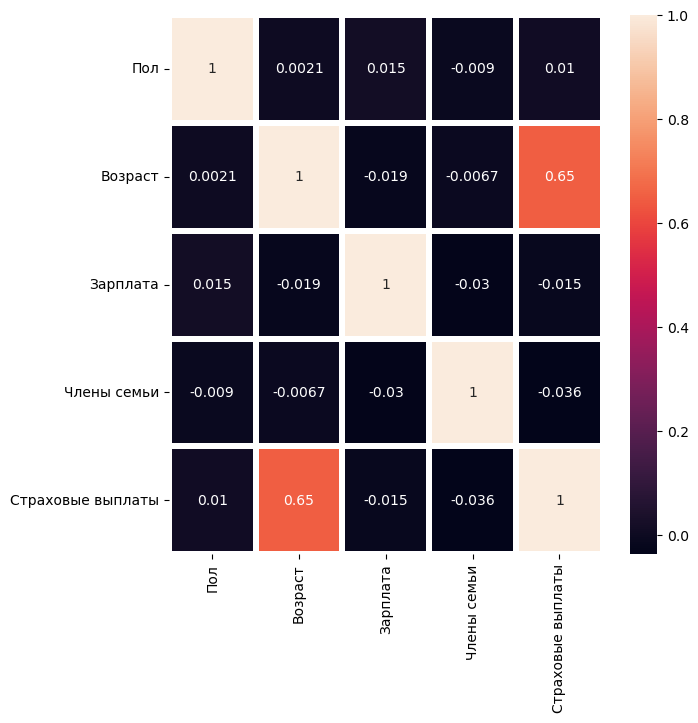

In [5]:
# построим матрицу корреляции.
plt.rcParams['figure.figsize'] = (7.0, 7.0)
sns.heatmap(insurance.corr(), annot=True, linewidths=3, linecolor='white')


In [6]:
# Посмотрим на мультиколлинеарность, исправлять в данном проекте ее не будем, но не плохо об этом понимать.
# Мультиколлинеарность - это наличие высокой корреляции между двумя или более независимыми переменными (предикторами). По сути, это явление, при котором независимые переменные взаимосвязаны.
def vif_scores(df):
    VIF_Scores = pd.DataFrame()
    VIF_Scores["Independent Features"] = df.columns
    VIF_Scores["VIF Scores"] = [variance_inflation_factor(df.values,i) for i in range(df.shape[1])]
    return VIF_Scores
vif_scores(insurance)


Independent Features  VIF Scores
0                  Пол    1.950884
1              Возраст   12.171109
2             Зарплата   10.131784
3          Члены семьи    2.133779
4    Страховые выплаты    1.581746

In [7]:
# удалим дубликаты и проверим.
insurance.drop_duplicates(inplace=True)
print(f'Количество дубликатов: {insurance.duplicated().sum()}')


Количество дубликатов: 0


### вывод
Датафрейм содержит 5000 строк и 5 столбцов, пропусков в данных нет.

Самому молодому страхователю 18, а самому пожилому- 65 лет.

Зарплата у клиентов колеблется от 5300 до 79000.

Зависимостей между признаками в данных не выявлено.

Посмотрели мультиколлинеарность признаков, она есть, но для данного проекта решать эту задачу не нужно.

Обнаружены и удалены дубликаты.

Данные не требуют предобработки.

## Умножение матриц

В этом задании вы можете записывать формулы в *Jupyter Notebook.*

Чтобы записать формулу внутри текста, окружите её символами доллара \\$; если снаружи —  двойными символами \\$\\$. Эти формулы записываются на языке вёрстки *LaTeX.* 

Для примера мы записали формулы линейной регрессии. Можете их скопировать и отредактировать, чтобы решить задачу.

Работать в *LaTeX* необязательно.

Обозначения:

- $X$ — матрица признаков (нулевой столбец состоит из единиц)

- $y$ — вектор целевого признака

- $P$ — матрица, на которую умножаются признаки

- $w$ — вектор весов линейной регрессии (нулевой элемент равен сдвигу)

Предсказания:

$$
a = Xw
$$

Задача обучения:

$$
w = \arg\min_w MSE(Xw, y)
$$

Формула обучения:

$$
w = (X^T X)^{-1} X^T y
$$

**Ответ:**

Качество линейной регрессии не изменится.

**Обоснование:**

Представим новую матрицу признаков как результат умножения исходной матрицы признаков на некую обратимую матрицу:

$$
X_1 = XP
$$

Тогда наша формула обучения примет вид:
$$
w_1 = (X_1^T X_1)^{-1} X_1^T y
$$

Подставив в нее значения 
$$
X_1
$$
получим: 
$$
w_1 = ((XP)^T XP)^{-1} (XP)^T y
$$

Воспользуемся следующими свойствами матриц, а именно:

Ассоциативное свойство умножения матриц.

$$
A(B C) = (A B)C
$$

Матрица, обратная к произведению матриц, является произведением матриц, обратных к множителям, переставленным местами.

$$
(A B)^{-1} = A^{-1} B^{-1}
$$

Транспонированное произведение двух матриц равно произведению двух этих транспонированных матриц в другом порядке.

$$
(A B)^T = A^T B^T
$$

$$
(A^T)^{-1} = (A^{-1})^T
$$

$$
(A B C)^{-1} = C^{-1} B^{-1} A^{-1}
$$

Произведение матрицы на обратную или наоборот- равно единичной матрице.

$$
A A^{-1} = E
$$

$$
A E = E A = A
$$

Тогда нашу формулу для расчета вектора весов можно переписать:

$$
w_1 = ((XP)^T XP)^{-1} (XP)^T y 
$$

$$
w_1 = (P^T (X^T X) P)^{-1} (XP)^T y
$$

$$
w_1 = (P^T (X^T X) P)^{-1} P^T X^T y
$$

$$
w_1 = P^{-1} (X^T X)^{-1} (P^T)^{-1} P^T X^T y
$$

$$
w_1 = P^{-1} (X^T X)^{-1} E X^T y
$$

$$
w_1 = P^{-1}w
$$

Тоже самое, для формулы предсказаний:

$$
a_1 = X_1w_1
$$

подставив получившиеся значения
$$
X_1 = XP
$$
и
$$
w_1 = P^{-1}w
$$
получим:
$$
a_1 = XPP^{-1}w 
$$

$$
a_1 = Xw
$$

Тем самым получаем, что наши предсказания не изменятся.

## Алгоритм преобразования

**Алгоритм**

Необходимо будет сделать:

* Сгенерировать обратимую матрицу, соответственно квадратную, размерностью соответствующую количеству столбцов признаков, а это 4x4.

* Умножить матрицу исходных признаков на сгенерированную матрицу.

* Посчитать качество модели на полученной матрице и сравнить его с качеством модели на матрице исходных данных.


**Обоснование**

Ранее мы выяснили, что предсказания на измененной и изначальной матрицах не должны отличаться.

Из этого следует, что результаты метрики R2 должны оказаться равны.

Тем самым мы докажем, что правильно защитили данные.

## Проверка алгоритма

In [8]:
# создадим исходные признаки
features = insurance.drop('Страховые выплаты', axis=1)
target = insurance['Страховые выплаты']

In [9]:
# методом random.normal() сгенерируем матрицу размером 4 на 4. при таком подходе вероятность получить необратимую матрицу близка к нулю.
matrix_generated = np.random.normal(size=(4, 4))

# посмотрим на неё.
display(matrix_generated)


array([[-0.83629442, -1.07260698, -1.32592844,  0.16075222],
       [-0.7498455 , -0.58252959, -1.01068683, -2.5414359 ],
       [ 0.41523117,  1.24983633,  0.85921518, -0.13794692],
       [-0.11540476,  0.03335718,  0.22667024,  0.18373635]])

In [10]:
# методом linalg.inv(), сделаем из сгенерированной матрицы обратную. одновременно проверим матрицу на обратимость, если появится ошибка, то изначально сгенерированная матрица не являлась обратимой.
matrix_reverse = np.linalg.inv(matrix_generated)
# Посмотрим результат
display(matrix_reverse)


array([[-0.89898436, -0.25670331, -0.80132119, -3.36580678],
       [ 0.98779028, -0.08125664,  1.6303457 , -0.76412128],
       [-0.93639367,  0.18257478, -0.79191305,  2.75006821],
       [ 0.41121756, -0.37172046,  0.17766278,  0.07456438]])

In [11]:
# создадим матрицу из изначальных признаков, перемножим ее на сгенерированную и обращенную матрицу и составим из полученной новый набор измененных признаков.
matrix = features.values
matrix_new = np.dot(matrix, matrix_reverse)
features_modified = pd.DataFrame(matrix_new, columns = features.columns)


In [12]:
# посмотрим на закодированнйе данные.
display(features_modified.head())


Пол      Возраст      Зарплата    Члены семьи
0 -46405.114637  9051.749174 -39212.666929  136368.762996
1 -35537.110073  6933.732139 -30017.522461  104467.516962
2 -19635.621253  3831.713951 -16582.894094   57729.272891
3 -39026.050210  7610.918523 -32988.181738  114661.946935
4 -24413.115770  4762.669886 -20624.082333   71752.019076

In [13]:
# создадим класс LinearRegression для обучения моделей.
class LinearRegression:
    def fit(self, train_features, train_target):
        X = np.concatenate((np.ones((train_features.shape[0], 1)), train_features), axis=1)
        y = train_target
        w = np.linalg.inv(X.T.dot(X)).dot(X.T).dot(y)
        self.w = w[1:]
        self.w0 = w[0]

    def predict(self, test_features):
        return test_features.dot(self.w) + self.w0


In [14]:
# обучим модель на первоначальных признаках и выведем  метрику качества R2.
model_first = LinearRegression()
model_first.fit(features, target)
predictions = model_first.predict(features)
r2_first = r2_score(target, predictions)
print(f'Метрика r2 на первоначальных признаках: {r2_first:.6f}')


Метрика r2 на первоначальных признаках: 0.430201


In [15]:
# обучим модель на закодированных признаках и выведем метрику качества R2.
model_second = LinearRegression()
model_second.fit(features_modified, target)
predictions = model_second.predict(features_modified)
r2_second = r2_score(target, predictions)
print(f'Метрика r2 на закодированных признаках: {r2_second:.6f}')


Метрика r2 на закодированных признаках: 0.430201


### Общий вывод

Для работы нам был дан датасет, который состоит из 5 столбцов и 5000 строк.

При осмотре данных пропусков обнаружено небыло, но мы нашли 153 дубликата, которые удалили.

После этого было доказано, что домножение признаков на обратимую матрицу не влияет на предсказания модели.

Далее мы расписали алгоритм преобразования и его обоснование.

После чего проверили алгоритм на первоначальных и закодированных признаках.

В результате проверки получили, что метрики R2 обеих моделей одинаковые.

А это означает -- умножение исходных данных на случайную обратимую матрицу, может быть применено для их шифрования и неподготовленный человек не сможет проанализировать данные.

Тогда как мы можем применить это, успешно предсказывая для каждого клиента количество страховых выплат.